In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [4]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [7]:
wine_quality.data.original

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
X.shape

(6497, 11)

In [9]:
y.shape

(6497, 1)

In [10]:
X.dtypes.unique()

array([dtype('float64')], dtype=object)

In [11]:
y.dtypes

quality    int64
dtype: object

In [23]:
X.isna().sum(axis=1).sum()

np.int64(0)

In [13]:
corr = X.corr()
tri_mat = np.triu(corr)

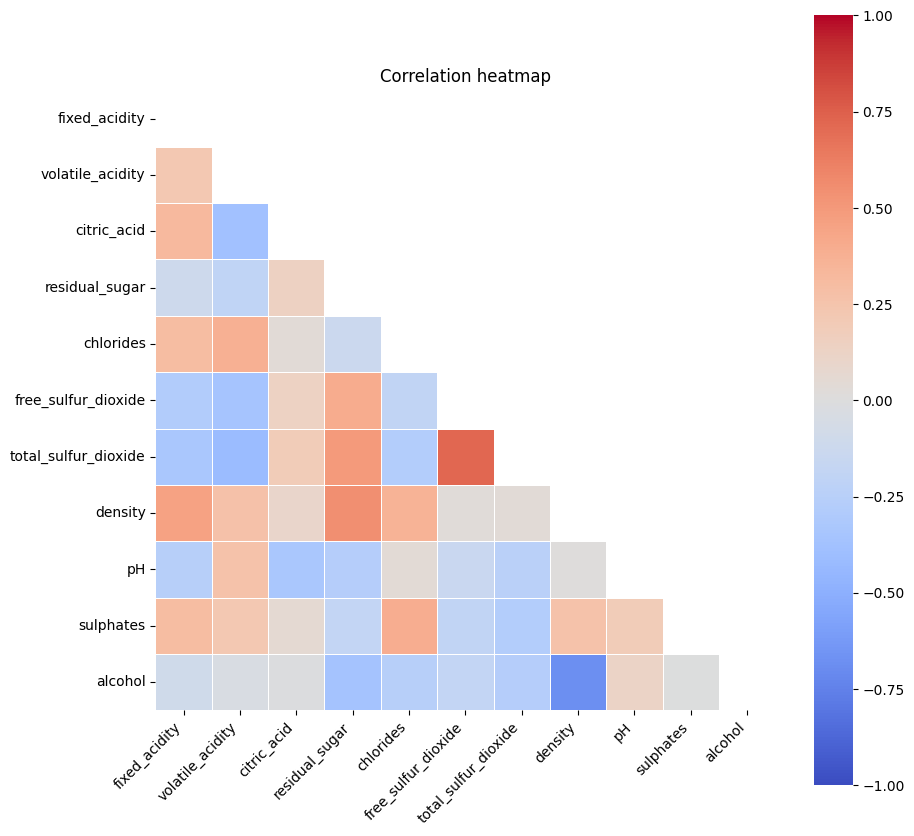

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=tri_mat, square=True, cmap='coolwarm', vmin=-1, vmax=1, linewidth=.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation heatmap')
plt.show()

In [24]:
X.mean()

fixed_acidity             7.215307
volatile_acidity          0.339666
citric_acid               0.318633
residual_sugar            5.443235
chlorides                 0.056034
free_sulfur_dioxide      30.525319
total_sulfur_dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
dtype: float64

In [15]:
X.var()

fixed_acidity              1.680740
volatile_acidity           0.027105
citric_acid                0.021117
residual_sugar            22.636696
chlorides                  0.001227
free_sulfur_dioxide      315.041192
total_sulfur_dioxide    3194.720039
density                    0.000009
pH                         0.025853
sulphates                  0.022143
alcohol                    1.422561
dtype: float64

We obviously need to standardise our variables because they lie on different scales of vastly different magnitudes.

In [16]:
X.density

0       0.99780
1       0.99680
2       0.99700
3       0.99800
4       0.99780
         ...   
6492    0.99114
6493    0.99490
6494    0.99254
6495    0.98869
6496    0.98941
Name: density, Length: 6497, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
df_X_scaled = pd.DataFrame(X_scaled)
df_X_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-3.849639e-16,1.049902e-16,2.187295e-17,3.499672e-17,1.749836e-17,-8.749179e-17,-6.999344e-17,-3.552167e-15,2.729744e-15,-5.424491e-16,6.561885e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00


In [18]:
from sklearn.decomposition import PCA

pca_X = PCA()
pca_X.fit(X_scaled)
pca_X.mean_

array([-3.84963896e-16,  1.04990153e-16,  2.18729486e-17,  3.49967178e-17,
        1.74983589e-17, -8.74917945e-17, -6.99934356e-17, -3.55216686e-15,
        2.72974399e-15, -5.42449126e-16,  6.56188458e-16])

In [36]:
scores = pca_X.transform(X_scaled)
scores

array([[-3.20599617,  0.41652332, -2.72223659, ..., -0.07122889,
        -0.10804627,  0.0274601 ],
       [-3.03905081,  1.10746213, -2.04695235, ...,  0.42912861,
        -0.26814891, -0.01547136],
       [-3.07189347,  0.87896444, -1.74257961, ...,  0.27103173,
        -0.08683191,  0.05414596],
       ...,
       [ 0.5711325 , -0.72266165,  0.09146896, ...,  0.13395723,
        -0.35617274,  0.15810258],
       [ 0.09005243, -3.54577991,  0.14119458, ...,  0.25594009,
         0.2663273 ,  0.05419644],
       [ 0.51257566, -2.89104008,  0.73941657, ...,  0.18171247,
        -0.1200586 ,  0.00853138]], shape=(6497, 11))

The scores are the coordinates of the data in rotated coordinate system.

In [26]:
pca_X.components_.shape

(11, 11)

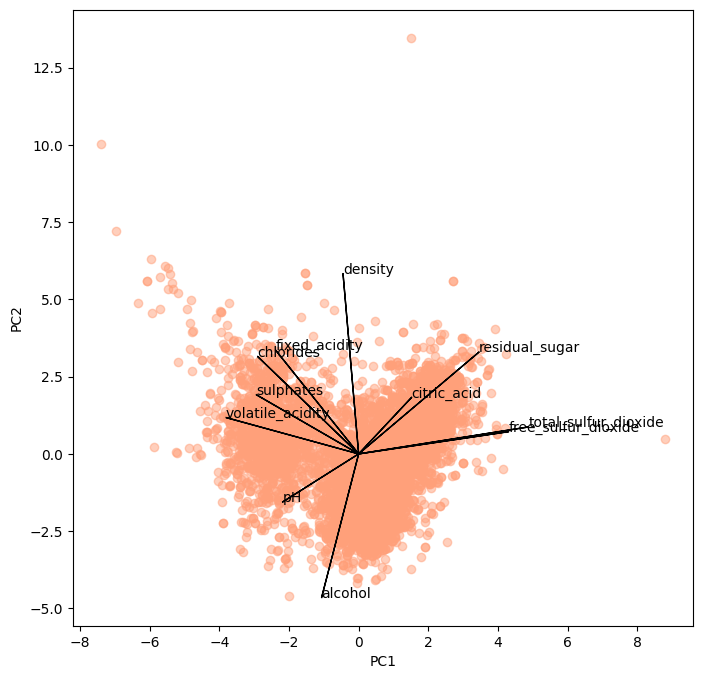

In [45]:
s_ = 10
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='lightsalmon', alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
for k in range(pca_X.components_.shape[1]):
    ax.arrow(0, 0, s_*pca_X.components_[0, k], s_*pca_X.components_[1, k])
    ax.text(s_*pca_X.components_[0, k], s_*pca_X.components_[1, k], X.columns[k])

We are now going to use 3 methods to determine how many PCs we are going to carry on with. As Hastie & Tibshirani explain, even in the case where our selection methods all point to the same optimal number of PCs, this number is not a ground truth and depends on the problem at hand. If we manage to extract interesting patterns from the data with the selected PCs, then we can try and carry out our analysis with one or more subsequent PCs. If on the other hand we do not find anything interesting in the data, more components will likely not reveal anything more.

In [34]:
pve_ratios = pca_X.explained_variance_ratio_
pve_ratios

array([0.2754426 , 0.22671146, 0.14148609, 0.08823201, 0.06544317,
       0.05521016, 0.04755989, 0.04559184, 0.03063855, 0.02069961,
       0.00298462])

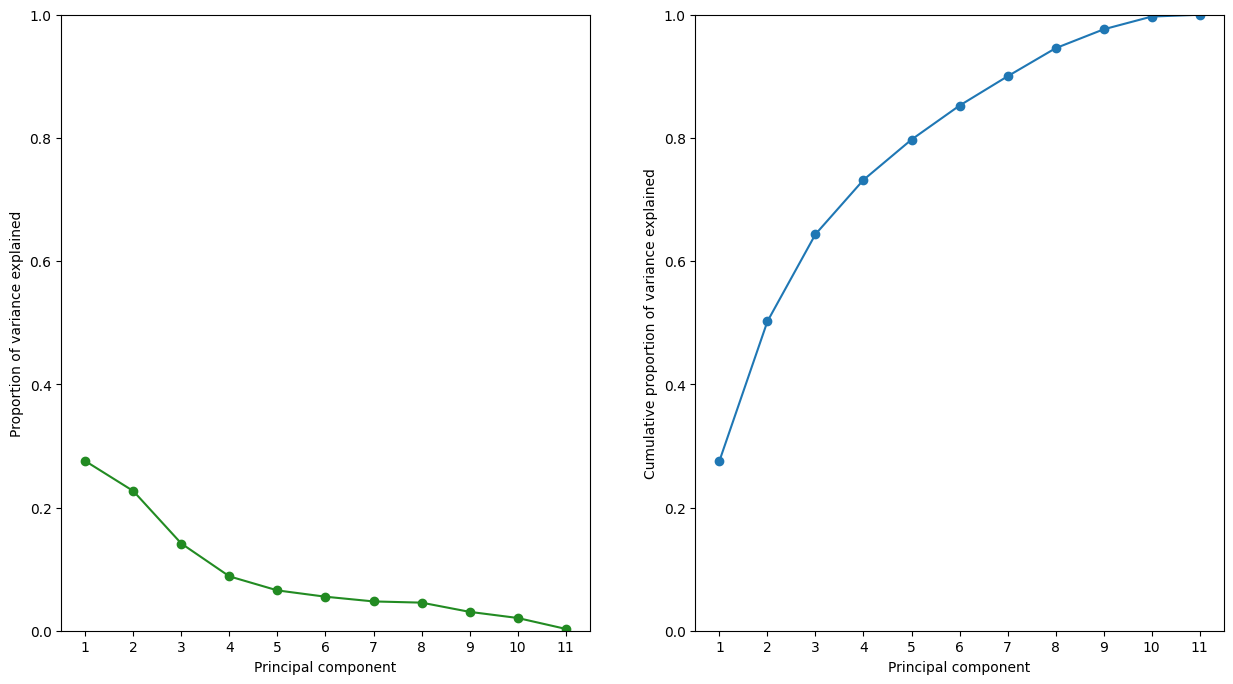

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
ticks = np.arange(pca_X.n_components_) + 1
ax = axes[0]
ax.plot(ticks, pve_ratios, marker='o', color='forestgreen')
ax.set_xlabel('Principal component')
ax.set_ylabel('Proportion of variance explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks);


ax = axes[1]
ax.plot(ticks, pve_ratios.cumsum(), marker='o')
ax.set_xlabel('Principal component')
ax.set_ylabel('Cumulative proportion of variance explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks);


In [48]:
pve_ratios.cumsum()

array([0.2754426 , 0.50215406, 0.64364015, 0.73187216, 0.79731533,
       0.85252548, 0.90008537, 0.94567722, 0.97631577, 0.99701538,
       1.        ])

In [49]:
# Kaiser's rule:

expl_var = pca_X.explained_variance_.round(3)

In [55]:
print(tabulate([expl_var], headers=[f'PC{k+1}' for k in range(11)], tablefmt='grid'))

+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+
|   PC1 |   PC2 |   PC3 |   PC4 |   PC5 |   PC6 |   PC7 |   PC8 |   PC9 |   PC10 |   PC11 |
+=======+=======+=======+=======+=======+=======+=======+=======+=======+========+========+
|  3.03 | 2.494 | 1.557 | 0.971 |  0.72 | 0.607 | 0.523 | 0.502 | 0.337 |  0.228 |  0.033 |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+


<img src="horn_PA.png" width="50%">

Verdict: 3 components!